# Tarea 6: TCL e introducción a Bootstrap

Solución de los ejercicios de la sección `Intervalos de confianza y remuestreo` del libro del curso [Fundamentos Estadísticos](https://tereom.github.io/fundamentos-2022/intervalos-de-confianza-y-remuestreo.html)

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import gamma, norm, probplot

In [2]:
path_universal = "C:\\Users\\Miguel\\Documents\\Github\\itam-mcd"
os.listdir(path_universal)

['.git',
 '.gitignore',
 'aprendizaje-automatico',
 'estadistica-computacional',
 'fundamentos-estadisticos',
 'mineria-analisis-datos',
 'optimizacion',
 'README.md']

In [3]:
path_asignatura = "fundamentos-estadisticos"
path_asignatura = os.path.join(path_universal, path_asignatura)
os.listdir(path_asignatura)

['datos', 'libros', 'README.md']

# Teorema central del límite
Navegar a la siguiente [liga](https://docs.scipy.org/doc/scipy/reference/stats.html) para consultar cómo constuir distribuciones con `python scipy`

**Ejemplo 1**
<br>Consideramos la distribución gamma con parámetro de forma $a=5$, tasa $\lambda = 0.1$. Su media teórica es $50 = 5/0.1$ cuya densidad teórica es:

In [4]:
x = np.arange(0, 150.01, 0.01)
lamb = 0.1

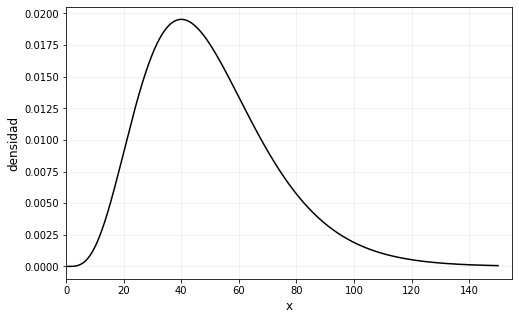

In [5]:
plt.figure(figsize=(8,5))
plt.plot(x, gamma.pdf(x, a=5, scale=1/lamb), color='black')

#Anotaciones y estilo
plt.xlabel('x', fontsize=12)
plt.xlim(0,155)
plt.ylabel('densidad', fontsize=12)
plt.grid(alpha=0.2)

plt.show()

Tomamos una muestra, la distribución de los datos se ve como sigue

In [6]:
n = 200
muestra = gamma.rvs(a=5, scale=1/lamb, size=n, random_state=232)

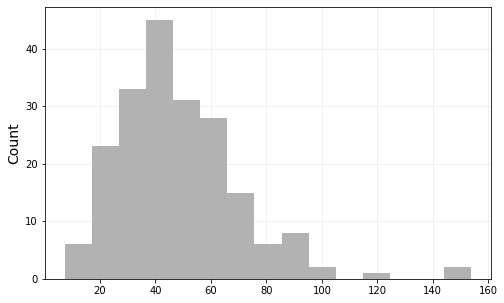

In [7]:
plt.figure(figsize=(8,5))

plt.hist(muestra, bins=15, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**NO** parece tener una distribución normal, está sesgada hacia la izquierda.

**Ahora** consideramos la distribución de muestreo de la media de esta distribución, con tamaño de muestra fijo $n$ para `5_000` iteraciones.

Documentación de la función [random.choices()](https://pynative.com/python-random-sample/)

In [8]:
medias_gamma = [np.mean(random.choices(list(muestra), k=n)) for _ in range(5_000)]

Haciendo un histograma, se puede observar que la **distribución muestral de medias es normal**.

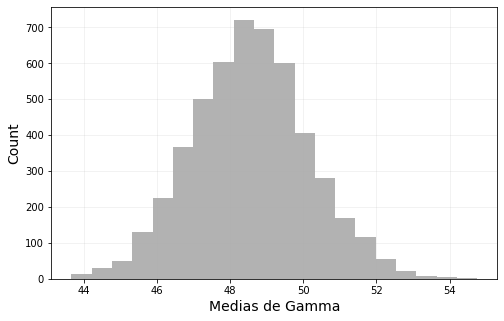

In [9]:
plt.figure(figsize=(8,5))

plt.hist(medias_gamma, bins=20, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.xlabel('Medias de Gamma', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**Ejemplo 2**:
<br>Este ejemplo es más complicado. Imaginemos que nuestro modelo teórico es una mezcla de dos poblaciones, una gamma y una normal:

In [10]:
def muestrear_pob(n):
    muestra = np.zeros(n)
    
    for i in range(n):
        if random.random() < 0.5:
            muestra[i] = gamma.rvs(a=5, scale=1/lamb, size=1)[0]
        else:
            muestra[i] = norm.rvs(loc=100, scale=1/lamb, size=1)[0]
    
    return muestra

In [11]:
x = np.arange(0, 150.01, 0.01)
lamb = 0.1

muestra_aprox = muestrear_pob(10_000)

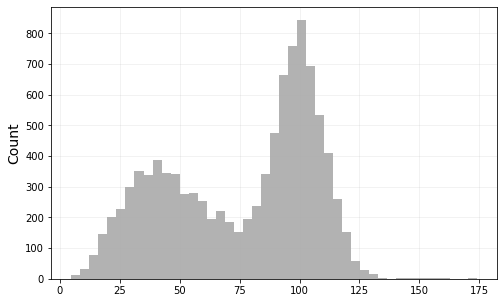

In [12]:
plt.figure(figsize=(8,5))

plt.hist(muestra_aprox, bins=45, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

**Ahora** consideramos estimar la media de esta distribución con una muestra tamaño 100. ¿Cómo se ve la distribución de muestreo de la media?

In [13]:
n = 100
medias = [np.mean(random.choices(list(muestra_aprox), k=n)) for _ in range(2_000)]

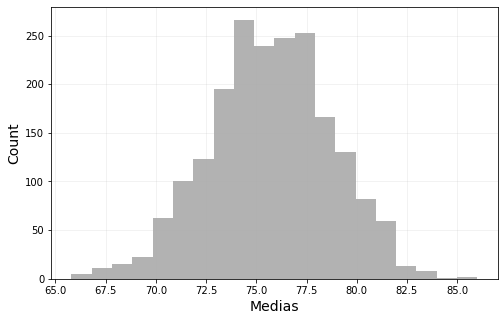

In [14]:
plt.figure(figsize=(8,5))

plt.hist(medias, bins=20, color='black', alpha=0.3)

#Anotaciones y estilo global
plt.xlabel('Medias', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(alpha=0.2)

plt.show()

Graficando `histograma` y `cuantil-cuantil normal`

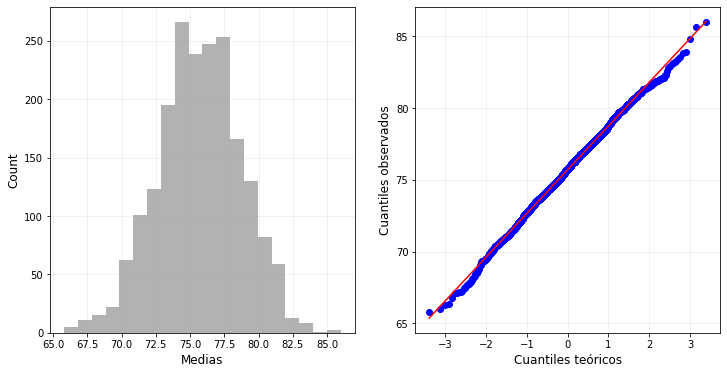

In [15]:
fig = plt.figure(figsize=(12,6))
spec = plt.GridSpec(nrows=1, ncols=2)

#Histograma
ax0 = fig.add_subplot(spec[0])
ax0.hist(medias, bins=20, color='black', alpha=0.3)
ax0.set_xlabel('Medias', fontsize=12)
ax0.set_ylabel('Count', fontsize=12)
ax0.grid(alpha=0.2)

#Gráfica cuantil-cuantil normal
ax1 = fig.add_subplot(spec[1])
probplot(medias, plot=ax1)
ax1.set_title('')
ax1.set_xlabel('Cuantiles teóricos', fontsize=12)
ax1.set_ylabel('Cuantiles observados', fontsize=12)
ax1.grid(alpha=0.2)

plt.show()